In [ ]:
"""
date: 04/23/2022
author: Pragya Verma
email: vpragya@uw.edu
"""

In [25]:
# import required packages
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
sns.set(rc={'figure.figsize':(15,6)})

## Hourly Trip Dataset

### Loading the Dataset

In [12]:
# loading the dataset
df_list = []
csv_path = 'D:\HerWill Datathon\dataset\\2017-0{}_1H_zone.csv'
for i in range(1,6):
    df_list.append(pd.read_csv(csv_path.format(i)))

trip_df = pd.concat(df_list)

### Preprocessing the data and performing feature engineering

In [13]:
# fetching the dataset columns
trip_df.columns

Index(['Unnamed: 0', 'PUZone', 'Count', 'PUTime'], dtype='object')

In [56]:
# percentage of empty rows
(trip_df.isna().sum() / trip_df.shape[0]) * 100

PUZone         0.0
Count          0.0
PUTime         0.0
date           0.0
time           0.0
hour           0.0
day_no         0.0
day_of_week    0.0
month          0.0
year           0.0
time_of_day    0.0
dtype: float64

There are no empty rows/cells present in the dataset.

In [14]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

def preprocess_trip_data(df):
    df.drop(columns = ['Unnamed: 0'], inplace=True) # dropping unnnamed: 0
    df['PUTime'] = pd.to_datetime(df['PUTime']) # converting obj to datetime
    df['date'] = pd.to_datetime(df['PUTime']).dt.date # fetching date
    df['time'] = pd.to_datetime(df['PUTime']).dt.time # fetching time
    df['hour'] = pd.to_datetime(df['PUTime']).dt.hour # fetching hour    
    df['day_no'] = pd.to_datetime(df['PUTime']).dt.weekday # fetching weekday number
    df['day_of_week'] = pd.to_datetime(df['PUTime']).dt.day_name() # fetching weekday
    df['month'] = pd.to_datetime(df['PUTime']).dt.month # fetching month
    df['year'] = pd.to_datetime(df['PUTime']).dt.year # fetching year
    df['time_of_day'] = df['hour'].apply(time_of_day)
    
    return df

In [15]:
# preprocessing the data
trip_df = preprocess_trip_data(trip_df)
trip_df.head()


### Performing EDA 

#### 1. Time and Zone wise ride count

In [18]:
# get the hourly count of rides zone-wise
trip_shapefile = trip_df.pivot(index = 'PUTime', columns='PUZone', values='Count')
trip_shapefile.head()

PUZone,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
PUTime,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,91,582,292,376,67,9,3,0,84,11,...,294,8,617,2,113,134,964,134,61,434
2017-01-01 01:00:00,137,786,210,221,121,4,1,1,119,21,...,302,8,556,4,151,153,985,215,70,356
2017-01-01 02:00:00,125,734,160,184,109,5,3,1,134,23,...,269,4,463,5,133,150,892,138,74,242
2017-01-01 03:00:00,161,482,171,272,94,8,4,1,94,18,...,235,4,404,6,113,92,1113,106,37,310
2017-01-01 04:00:00,151,329,104,228,59,2,0,0,51,27,...,153,3,385,3,90,88,813,45,21,218


#### 2. Hourly rides

In [19]:
hourly_rides = trip_df.groupby(['PUTime'])['Count'].sum()

Text(0.5, 1.0, 'Everyday Hourly Taxi Demand')

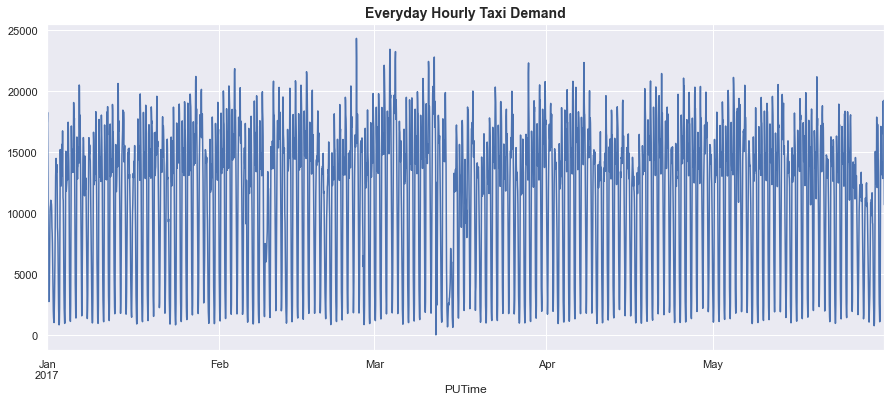

In [43]:
hourly_rides.plot()
plt.title("Everyday Hourly Taxi Demand", fontsize = 14, fontweight='bold')

<AxesSubplot:xlabel='Count', ylabel='Count'>

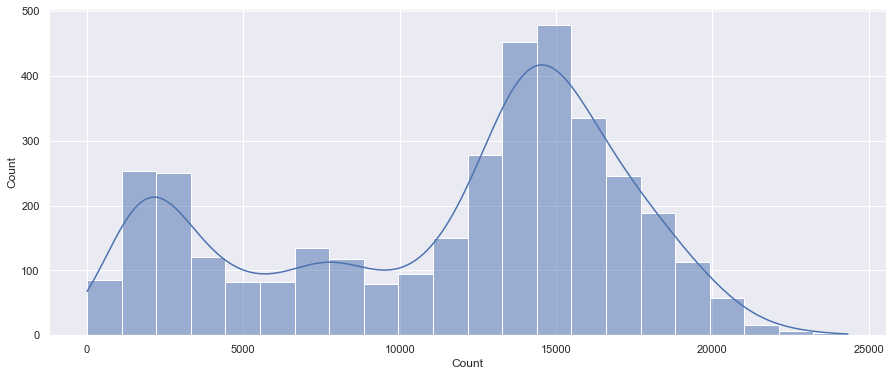

In [105]:
sns.histplot(hourly_rides, kde=True)

It has a bi-modal ditribution. 

***Note: check if its is normal***

#### 3. Daily rides

In [44]:
# get everyday rides count
daily_rides = trip_df.groupby(['date'])['Count'].agg(['sum','mean','std'])
daily_rides.head()

,sum,mean,std
date,,,
2017-01-01,220604,125.915525,146.070200
2017-01-02,184525,105.322489,145.459835
2017-01-03,237790,135.724886,184.575249
2017-01-04,247997,141.550799,189.574286
2017-01-05,280255,159.962900,211.499304


Text(0.5, 1.0, 'Daily Taxi Demand')

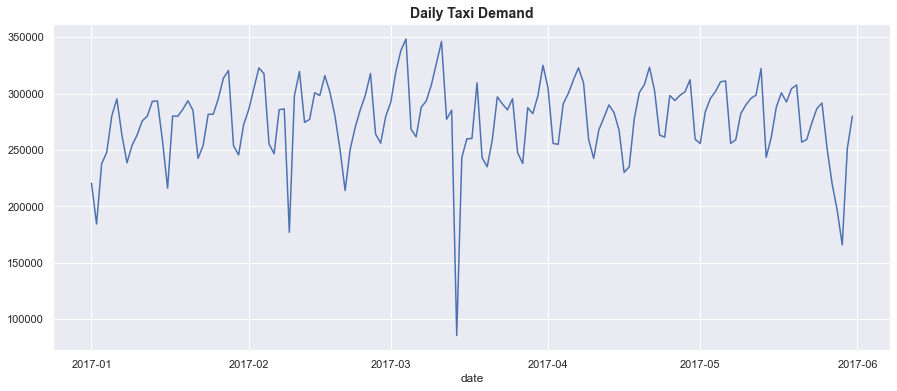

In [47]:
# plotting the daily rides
daily_rides['sum'].plot()
plt.title("Daily Taxi Demand", fontsize = 14, fontweight='bold')

From above line plot, we can say that there is seasonality however, there does not exist any trend in the dataset.

<AxesSubplot:xlabel='sum', ylabel='Count'>

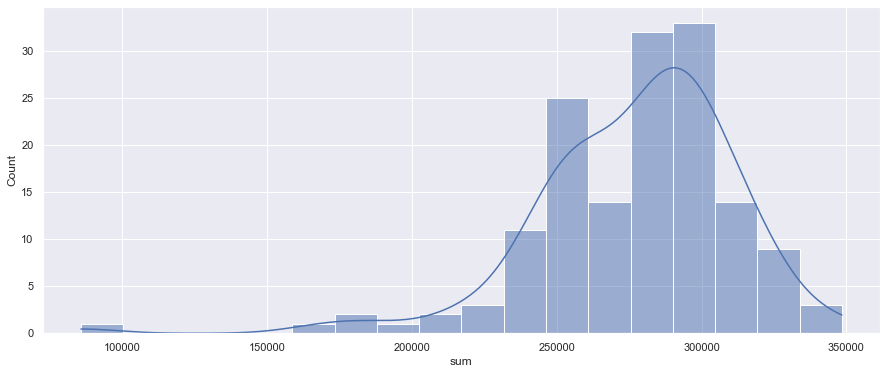

In [107]:
sns.histplot(daily_rides['sum'], kde=True)

***Note: Should we remove the skewness in it?***

Text(0.5, 1.0, 'Avg and Std Daily Taxi Demand')

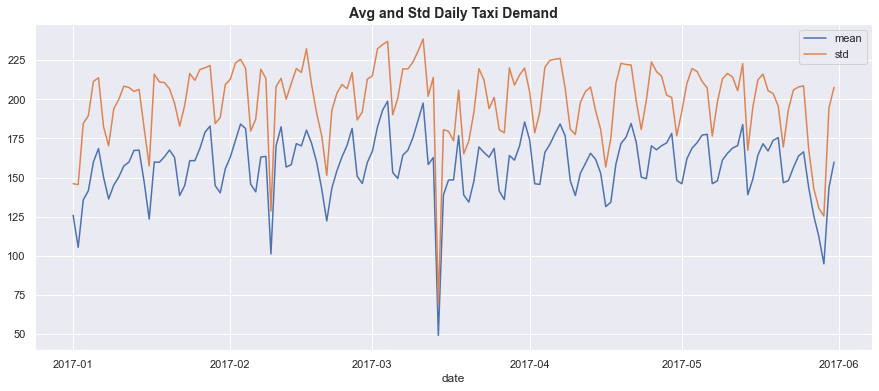

In [49]:
# plotting the daily avg and std rides
daily_rides[['mean', 'std']].plot()
plt.title("Avg and Std Daily Taxi Demand", fontsize = 14, fontweight='bold')

#### 4. Monthly Rides

In [23]:
monthly_rides = trip_df.groupby(['month'])['Count'].sum()
monthly_rides

month
1    8289917
2    7837040
3    8698152
4    8508362
5    8496786
Name: Count, dtype: int64

##### 5. Weekly Rides

In [27]:
weekdays_per_hour = pd.pivot_table(trip_df, values='Count', index=['hour'],columns=['day_of_week'], aggfunc=np.sum)
weekdays_per_hour 

day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,189695,93354,296918,328871,139104,95715,116332
1,120030,57205,250716,292550,79737,54114,65900
2,76491,37686,203172,230002,49152,32969,40686
3,49047,25966,145329,180469,31644,21623,26343
4,37404,26327,84000,104785,27361,22003,25297
5,54300,48813,38884,42631,52675,51350,53903
6,156225,144753,59781,50603,164566,165187,170469
7,290080,256052,96959,76396,304970,297920,316018
8,349500,312422,161938,123712,361352,357148,378385


Text(0.5, 1.0, 'Hourly Taxi Demand')

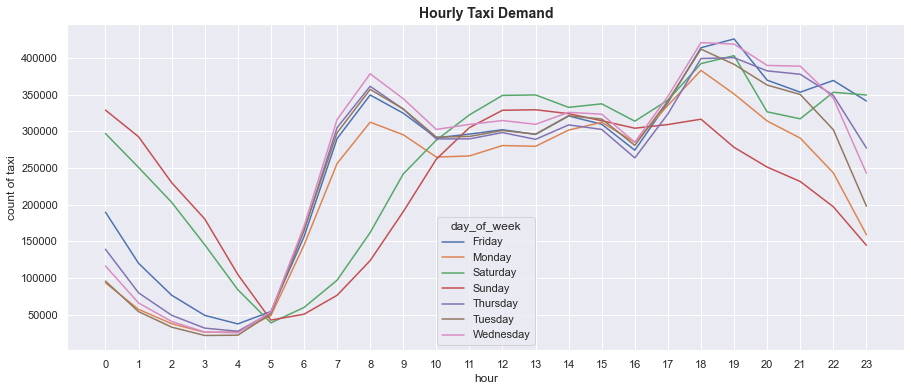

In [41]:
weekdays_per_hour.plot(xticks=weekdays_per_hour.index, ylabel='count of taxi')
plt.title("Hourly Taxi Demand", fontsize = 14, fontweight='bold')

## Weather Dataset

### Loading the Dataset

In [50]:
weather_df = pd.read_csv('D:\HerWill Datathon\dataset\weather.csv')
weather_df.head()

,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
0,1/1/17,5.59,NaN,0.00,0.0,0.0,NaN,48.0,40.0,NaN,...,310.0,15.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1/2/17,9.17,NaN,0.21,0.0,0.0,NaN,41.0,37.0,NaN,...,70.0,17.0,25.1,1.0,NaN,NaN,1.0,NaN,NaN,NaN
2,1/3/17,10.74,NaN,0.58,0.0,0.0,NaN,43.0,39.0,NaN,...,60.0,21.0,30.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,1/4/17,8.05,NaN,0.00,0.0,0.0,NaN,52.0,34.0,NaN,...,290.0,23.9,36.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
4,1/5/17,7.83,NaN,0.00,0.0,0.0,NaN,34.0,27.0,NaN,...,290.0,17.0,27.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [55]:
# percentage of empty rows
(weather_df.isna().sum() / weather_df.shape[0]) * 100

DATE     16.574586
AWND     16.574586
PGTM    100.000000
PRCP     16.574586
SNOW     16.574586
SNWD     16.574586
TAVG    100.000000
TMAX     16.574586
TMIN     16.574586
TSUN    100.000000
WDF2     16.574586
WDF5     17.679558
WSF2     16.574586
WSF5     17.679558
WT01     66.298343
WT02     95.580110
WT03    100.000000
WT04     99.447514
WT05    100.000000
WT06     99.447514
WT08     85.635359
dtype: float64

We can see that there are a lot of empty values. If you look closely, that even few of the date columns are empty. Upon inspecting the data manually, for this, we found that the last 30 rows were empty.

In [59]:
# Dropping last 30 rows using drop
weather_df.drop(weather_df.tail(30).index, inplace = True)

# checking if we removed empty rows
weather_df.tail()

,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
146,5/27/17,3.13,NaN,0.00,0.0,0.0,NaN,71.0,59.0,NaN,...,290.0,8.1,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,5/28/17,4.47,NaN,0.00,0.0,0.0,NaN,71.0,58.0,NaN,...,170.0,12.1,21.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
148,5/29/17,5.14,NaN,0.13,0.0,0.0,NaN,61.0,56.0,NaN,...,80.0,12.1,14.1,1.0,NaN,NaN,NaN,NaN,NaN,NaN
149,5/30/17,2.68,NaN,0.06,0.0,0.0,NaN,60.0,55.0,NaN,...,150.0,12.1,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
150,5/31/17,2.46,NaN,0.03,0.0,0.0,NaN,75.0,58.0,NaN,...,50.0,12.1,17.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
# percentage of empty rows
(weather_df.isna().sum() / weather_df.shape[0]) * 100

DATE      0.000000
AWND      0.000000
PGTM    100.000000
PRCP      0.000000
SNOW      0.000000
SNWD      0.000000
TAVG    100.000000
TMAX      0.000000
TMIN      0.000000
TSUN    100.000000
WDF2      0.000000
WDF5      1.324503
WSF2      0.000000
WSF5      1.324503
WT01     59.602649
WT02     94.701987
WT03    100.000000
WT04     99.337748
WT05    100.000000
WT06     99.337748
WT08     82.781457
dtype: float64

Now, the columns in the end only contains either ***1*** if the ***weather type*** is True or else ***0*** (one hot encoding different weather). So, if the columns val is Nan we are substituting it with zero. 

In [68]:
weather_df.fillna({'WDF5':0, 'WSF5':0, 'WT01':0, 'WT02':0, 'WT03':0, 'WT04':0, 'WT05':0, 'WT06':0, 'WT08':0},  inplace=True)
weather_df.drop(columns=['PGTM', 'TAVG', 'TSUN'], inplace=True)

In [69]:
(weather_df.isna().sum() / weather_df.shape[0]) * 100

DATE    0.0
AWND    0.0
PRCP    0.0
SNOW    0.0
SNWD    0.0
TMAX    0.0
TMIN    0.0
WDF2    0.0
WDF5    0.0
WSF2    0.0
WSF5    0.0
WT01    0.0
WT02    0.0
WT03    0.0
WT04    0.0
WT05    0.0
WT06    0.0
WT08    0.0
dtype: float64

Now we can see that we got rid of the empty columns and empty cells.

In [86]:
weather_df['DATE'] = pd.to_datetime(weather_df['DATE']).dt.date # converting obj to date

### Performing EDA

<AxesSubplot:xlabel='DATE', ylabel='AWND'>

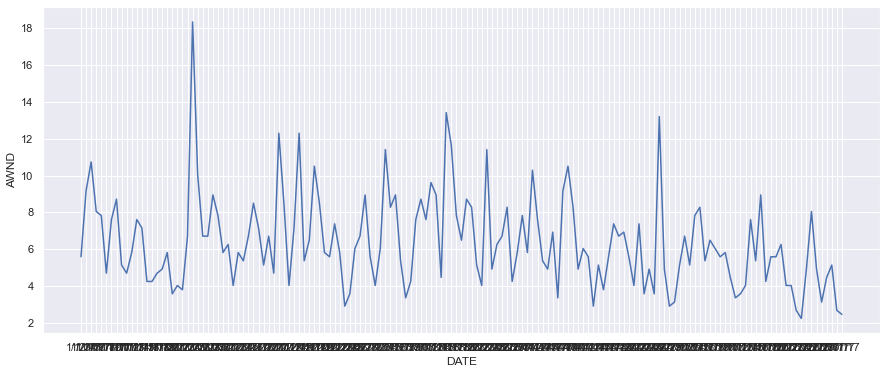

In [74]:
sns.lineplot(x = 'DATE', y = 'AWND', data = weather_df)

## Merging Both Dataset and then analysing it

In [89]:
taxi_df = pd.merge(trip_df, weather_df, how="left", left_on='date', right_on='DATE')
taxi_df.head()

,PUZone,Count,PUTime,date,time,hour,day_no,day_of_week,month,year,...,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
0,0,91,2017-01-01,2017-01-01,00:00:00,0,6,Sunday,1,2017,...,310.0,15.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,582,2017-01-01,2017-01-01,00:00:00,0,6,Sunday,1,2017,...,310.0,15.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,292,2017-01-01,2017-01-01,00:00:00,0,6,Sunday,1,2017,...,310.0,15.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,376,2017-01-01,2017-01-01,00:00:00,0,6,Sunday,1,2017,...,310.0,15.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,67,2017-01-01,2017-01-01,00:00:00,0,6,Sunday,1,2017,...,310.0,15.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [92]:
daily_rides_with_weather = pd.merge(daily_rides, weather_df, how="left", left_on='date', right_on='DATE')
daily_rides_with_weather = daily_rides_with_weather.set_index('DATE')
daily_rides_with_weather.head()

,sum,mean,std,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT05,WT06,WT08
DATE,,,,,,,,,,,,,,,,,,,,
2017-01-01,220604,125.915525,146.070200,5.59,0.00,0.0,0.0,48.0,40.0,260.0,310.0,15.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-01-02,184525,105.322489,145.459835,9.17,0.21,0.0,0.0,41.0,37.0,70.0,70.0,17.0,25.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2017-01-03,237790,135.724886,184.575249,10.74,0.58,0.0,0.0,43.0,39.0,70.0,60.0,21.0,30.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-01-04,247997,141.550799,189.574286,8.05,0.00,0.0,0.0,52.0,34.0,280.0,290.0,23.9,36.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2017-01-05,280255,159.962900,211.499304,7.83,0.00,0.0,0.0,34.0,27.0,250.0,290.0,17.0,27.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
correlation = daily_rides_with_weather.corr()
print(correlation['sum'])

sum     1.000000
mean    1.000000
std     0.928476
AWND   -0.036787
PRCP   -0.092123
SNOW   -0.411339
SNWD   -0.161922
TMAX    0.025052
TMIN    0.015537
WDF2    0.111192
WDF5    0.060295
WSF2    0.007029
WSF5    0.081016
WT01   -0.024496
WT02   -0.206472
WT03         NaN
WT04   -0.216311
WT05         NaN
WT06   -0.005780
WT08   -0.168615
Name: sum, dtype: float64


[]

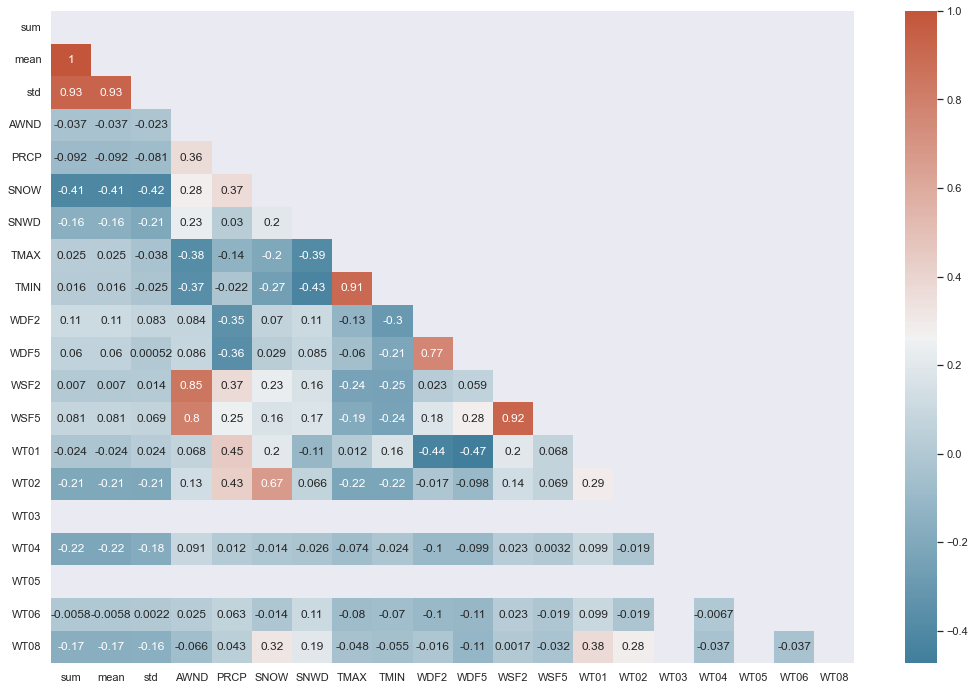

In [102]:
f, ax = plt.subplots(figsize=(18, 12))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(correlation, dtype=bool))
# Configure a custom diverging colormap

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation, annot=True, mask = mask, cmap=cmap)
plt.plot()

***NOTE: Should we perform one-hot encoding for weekday for better forecasting?***


***Models that can be used: baseline model, ARIMA/ARMA (based on ACF/PACF), LR, Random forest regression, XGBoost Regression***

1. Dummy for weekday and weekends
2. Network graph of data points in json (with slider)